In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()



In [13]:
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
target=pd.Series(cancer.target,name='target')
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled=ss.fit_transform(df)

In [20]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [19]:
df_scaled=pd.DataFrame(scaled,columns=cancer.feature_names)
df_scaled.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [38]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=2)

In [39]:
df_pca1_array=pca1.fit_transform(df_scaled)

In [40]:
col=['feature 1','feature 2']
df_pca1=pd.DataFrame(df_pca1_array,columns=col)


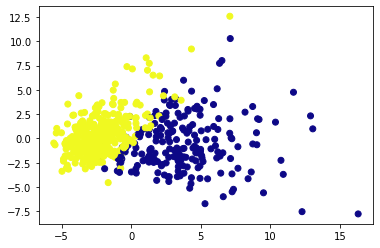

In [41]:
plt.scatter(df_pca1['feature 1'],df_pca1['feature 2'],c=cancer.target,cmap='plasma')


In [47]:
x=df
y=target

In [48]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x)


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)


In [62]:
pca1=PCA(0.95)
x_train_pca1=pca1.fit_transform(x_train)
x_test_pca1=pca1.fit_transform(x_test)

In [63]:
x_train_pca1.shape

(455, 10)

In [64]:
x_test_pca1.shape

(114, 9)

In [59]:
model1=LogisticRegression()
model1.fit(x_train_pca1,y_train)
model1.score(x_test_pca1,y_test)

ValueError: X has 9 features, but LogisticRegression is expecting 10 features as input.

## THIS IS THE ERROR BECAUSE  X_TRAIN AND X_TEST HAS DIFFERENT SHAPES 
##### TO GET RID OF THIS ERROR WE SHOULD DO TRAIN-TEST SPLIT AFTER THE PCA AND PCA SHOULD BE DONE ON WHOLE SCALED DATASET

## PCA WITH RETAINING 92% OF UEFUL INFORMATION

In [69]:
pca2=PCA(0.92)
x_pca2=pca2.fit_transform(df_scaled)
x_pca2.shape

(569, 8)

In [70]:
x_train_pca2,x_test_pca2,y_train_pca2,y_test_pca2=train_test_split(x_pca2,y,test_size=0.2,random_state=0)

In [71]:
m1=LogisticRegression()
m1.fit(x_train_pca2,y_train)
m1.score(x_test_pca2,y_test)

0.956140350877193

### PCA WITH RETAINING 95% OF USEFUL INFORMATION

In [72]:
pca3=PCA(0.95)
x_pca3=pca3.fit_transform(df_scaled)

x_train_pca3,x_test_pca3,y_train_pca3,y_test_pca3=train_test_split(x_pca3,y,test_size=0.2,random_state=0)
m1=LogisticRegression()
m1.fit(x_train_pca3,y_train)
m1.score(x_test_pca3,y_test)

0.9473684210526315

In [73]:
x_pca3.shape

(569, 10)

In [74]:
pca4=PCA(n_components=2)
x_pca4=pca4.fit_transform(df_scaled)

x_train_pca4,x_test_pca4,y_train_pca4,y_test_pca4=train_test_split(x_pca4,y,test_size=0.2,random_state=0)
m1=LogisticRegression()
m1.fit(x_train_pca4,y_train)
m1.score(x_test_pca4,y_test)

0.9298245614035088